In [1]:
import numpy as np
import pandas as pd

df = pd.read_json("https://data.cityofchicago.org/resource/kn9c-c2s2.json")
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [2]:
df = df.drop(index = 77)
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [3]:
df.describe()

,ca,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,49.506494
std,22.371857,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,25.000000
50%,39.000000,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,50.000000
75%,58.000000,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [7]:
newdf = df[['percent_households_below_poverty','percent_aged_16_unemployed']]
newdf

,percent_households_below_poverty,percent_aged_16_unemployed
0,23.6,8.7
1,17.2,8.8
2,24.0,8.9
3,10.9,8.2
4,7.5,5.2
...,...,...
72,16.9,20.8
73,3.4,8.7
74,13.2,15.0
75,15.4,7.1


In [8]:
newdf['ratio_of_unemployed_below_poverty'] = newdf.apply(lambda row: row.percent_households_below_poverty / row.percent_aged_16_unemployed, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
newdf

,percent_households_below_poverty,percent_aged_16_unemployed,ratio_of_unemployed_below_poverty
0,23.6,8.7,2.712644
1,17.2,8.8,1.954545
2,24.0,8.9,2.696629
3,10.9,8.2,1.329268
4,7.5,5.2,1.442308
...,...,...,...
72,16.9,20.8,0.812500
73,3.4,8.7,0.390805
74,13.2,15.0,0.880000
75,15.4,7.1,2.169014


In [0]:
newdf = pd.to_csv("newdataframe.csv")

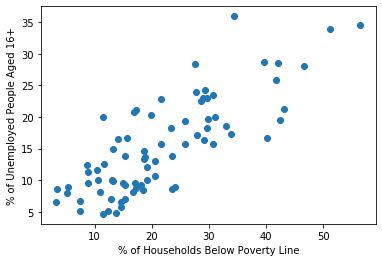

In [11]:
from matplotlib import pyplot as plt 


X = newdf[['percent_households_below_poverty','percent_aged_16_unemployed']]

plt.scatter(X['percent_households_below_poverty'], X['percent_aged_16_unemployed'])
plt.xlabel('% of Households Below Poverty Line')
plt.ylabel('% of Unemployed People Aged 16+')
plt.show()


This scatterplot shows that the data is most suited for linear regression, if one were to create a model surrounding the data. Additionally, we could consider clustering, as several of the points seem to be very close together. Most of the data points are congregating in the 5-20% range for unemployed people aged 16+, while they congregate in the 10-30% range for households below the poverty line.

Looking at this new dataframe, I would want to know what the top five areas are with the highest ratio between their unemployed population and the percentage of households below the poverty line. This would give us a better insight into which areas need more assistance with employment.